<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
def scatterplot(X_,Y_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('Componente principal 1',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('Componente principal 2',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [7]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(6,4))
    plt.title(title_,fontsize='large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(serie_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [21]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
URL_Demanda = 'https://drive.google.com/file/d/1KpY2p4bfVEwGRh5tJjMx9QpH6SEwrUwH/view?usp=sharing'
df = pd.read_csv(path + URL_Demanda.split('/')[-2], usecols=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','Y'] )
dfx = df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18']]  
dfy = df[['Y']]
#dfx  = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
#dfx.dropna(inplace=True)
#dfx = df.iloc[:1500, :]
#dfx.head()

In [22]:
X = dfx.to_numpy()
y = dfy.to_numpy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7, random_state = 5)

In [ ]:
sns.set_theme(style = 'ticks')
sns.set(font_scale=1)
sns.pairplot( dfx.sample(n=200,replace=False) , height=1) 
plt.savefig('fig_t14_corr_dem.png',transparent=True)

### Análisis de componentes principales en Regresión

Análisis de componentes principales es un métodos de reducción de dimensiones que puede ser usado paraescoger un subconjunto de variables que expliquen la mayor varianza, es decir que representen en mayor medida los datos originales. Las variables eliminadas serán redundates con otras. Además otras variables isntéticas llamadas latentes o componentes en el PCA pueden explicar partes importantes del fenómeno. El enfoque se basa en reducir el número de predictores a una dimensión más pequeña mediante el análisis de componentes principales. Estos componentes principales luego se utilizan como regresores al ajustar un nuevo modelo OLS.

99.91460521885719


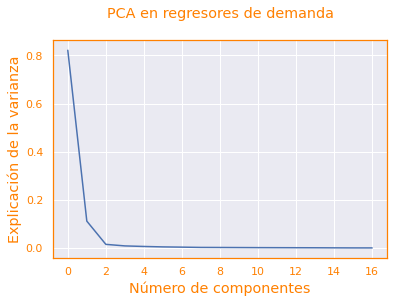

In [24]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(0.999) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca_9999per')

In [25]:
pca.components_
pca.n_components_
pca.singular_values_

array([50.24705368, 18.58794141,  7.01973703,  5.43557514,  4.73759517,
        4.10603429,  3.7076992 ,  3.1959674 ,  3.07906039,  2.91354441,
        2.75690543,  2.63678107,  2.51421084,  2.4006517 ,  2.20089014,
        2.00369984,  1.96864571])

### Calculamos la regresión con los datos originales

In [26]:
model = LinearRegression().fit(X_train[:, :], y_train)
err1_mae = np.mean(np.abs(y_train - model.predict(X_train)))
err1_mae_test = np.mean(np.abs(y_test - model.predict(X_test)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err1_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err1_mae_test)

# calculating VIF for each feature
for i in range(X_train.shape[1]):
    print('VIF X[',i,'] =',variance_inflation_factor(X_train,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 102.03653229489723
MAE del modelo de regresión con datos de prueba con sklearn: 131.86027342669107
VIF X[ 0 ] = nan
VIF X[ 1 ] = 19.268815602047138
VIF X[ 2 ] = 25.900291272307413
VIF X[ 3 ] = 21.75005645732436
VIF X[ 4 ] = 31.3039369332227
VIF X[ 5 ] = 16.94503888144909
VIF X[ 6 ] = 23.182547018706778
VIF X[ 7 ] = 21.415405802141464
VIF X[ 8 ] = 32.21371857799564
VIF X[ 9 ] = 13.042998282179228
VIF X[ 10 ] = 19.990213915947887
VIF X[ 11 ] = 18.269618431784952
VIF X[ 12 ] = 9.088089141611725
VIF X[ 13 ] = 4.594616265979086
VIF X[ 14 ] = 33.45388030260464
VIF X[ 15 ] = 26.546509209585857
VIF X[ 16 ] = 31.938715377963362
VIF X[ 17 ] = 17.948772566166706
VIF X[ 18 ] = 21.219310770169713


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [27]:
linreg_model      = LinearRegression().fit(X_pca[:, :], y_train)
err2_mae = np.mean(np.abs(y_train - linreg_model.predict(X_pca)))
err2_mae_test = np.mean(np.abs(y_test - linreg_model.predict(X_pcat)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err2_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err2_mae_test)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print('VIF X_pca[',i,'] =',variance_inflation_factor(X_pcat,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 104.85297721802614
MAE del modelo de regresión con datos de prueba con sklearn: 129.9635491835863
VIF X_pca[ 0 ] = 1.0902761450916674
VIF X_pca[ 1 ] = 1.0598828741461448
VIF X_pca[ 2 ] = 1.1162592918553464
VIF X_pca[ 3 ] = 1.1397838108123455
VIF X_pca[ 4 ] = 1.1518345438624478
VIF X_pca[ 5 ] = 1.1180330342217608
VIF X_pca[ 6 ] = 1.149140164185122
VIF X_pca[ 7 ] = 1.073119508332448
VIF X_pca[ 8 ] = 1.1062065782172554
VIF X_pca[ 9 ] = 1.0769513003199367
VIF X_pca[ 10 ] = 1.0707688594066322
VIF X_pca[ 11 ] = 1.1449913192733503
VIF X_pca[ 12 ] = 1.1073390849240747
VIF X_pca[ 13 ] = 1.0766506639766598
VIF X_pca[ 14 ] = 1.1056761841580338
VIF X_pca[ 15 ] = 1.1394736033361414
VIF X_pca[ 16 ] = 1.0866897976125844


98.0482312476889


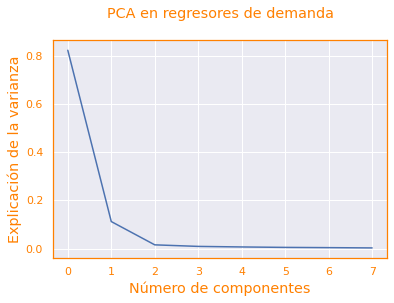

In [28]:
pca = PCA(0.98) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14_variance_pca2_98perc')

In [29]:
linreg_model  = LinearRegression().fit(X_pca[:, :], y_train)
err3_mae      = np.mean(np.abs(y_train - linreg_model.predict(X_pca)))
err3_mae_test = np.mean(np.abs(y_test - linreg_model.predict(X_pcat)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err3_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err3_mae_test)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print('VIF X_pca[',i,'] =',variance_inflation_factor(X_pcat,i)) 

MAE del modelo de regresión con datos de entrenamiento con sklearn: 111.79413703293265
MAE del modelo de regresión con datos de prueba con sklearn: 130.55280746630132
VIF X_pca[ 0 ] = 1.0202126662701723
VIF X_pca[ 1 ] = 1.0309617986088888
VIF X_pca[ 2 ] = 1.0433254564831038
VIF X_pca[ 3 ] = 1.0802131687107597
VIF X_pca[ 4 ] = 1.0239019535969995
VIF X_pca[ 5 ] = 1.0637878942632697
VIF X_pca[ 6 ] = 1.0605053887139235
VIF X_pca[ 7 ] = 1.0088605587066386


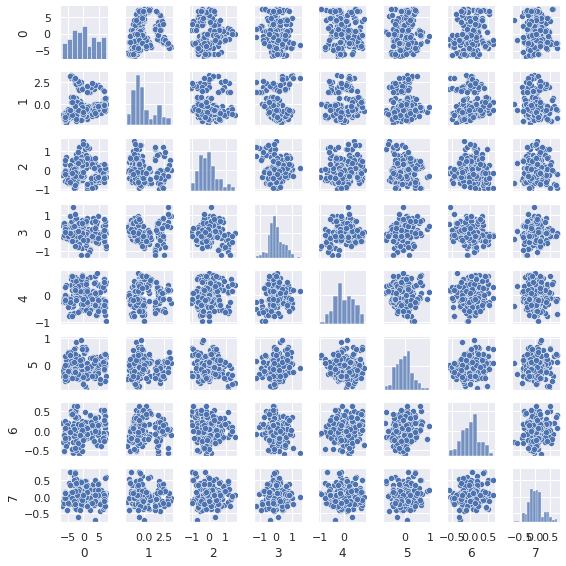

In [33]:
sns.set_theme(style = 'ticks') #style = ''
sns.set(font_scale=1) 
dfaux = pd.DataFrame(X_pcat).sample(n=200,replace=False)
sns.pairplot(dfaux, height=1)
plt.savefig('fig_t14_corr_pca.png',transparent=True)

### PCA from Scratch

In [31]:
def PCAfromScratch(X , num_components):     
    X_meaned = X - np.mean(X , axis = 0)     
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    idx                 = np.argsort(eigen_values)[::-1]
    print(idx)
    sorted_eigenvalue   = eigen_values[idx]
    sorted_eigenvectors = eigen_vectors[:,idx]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced, eigen_values, 

In [32]:
#Applying it to PCA function
mat_reduced ,eigen_values, = PCAfromScratch(X , 12)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced)
principal_df


[18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.598026,0.912949,0.752409,0.713978,0.022649,-0.007495,-0.022037,0.318160,-0.303551,0.255477,0.108072,0.135600
1,-0.742100,1.015275,0.689037,0.904083,-0.021475,0.023846,-0.203283,0.121392,-0.155629,0.452719,0.126879,0.322789
2,-0.983421,0.867777,0.551197,0.949123,-0.049680,0.043048,-0.055927,0.084769,0.131396,0.298376,0.029264,0.252983
3,-1.190426,0.877608,0.543978,0.644281,-0.058860,-0.090205,0.152465,0.025415,0.104236,-0.136131,-0.071127,0.100298
4,-1.079222,0.979436,0.564403,0.453363,-0.192928,-0.302365,0.128677,-0.359147,-0.002343,-0.311500,-0.085790,0.223305
...,...,...,...,...,...,...,...,...,...,...,...,...
571,-1.942460,-1.219012,1.255551,-0.971341,0.873665,0.084815,-0.005489,0.255370,-0.123108,0.110559,0.072428,0.225521
572,-1.764630,-1.300275,1.371033,-0.901983,0.898811,0.033585,-0.093054,0.276018,0.051745,0.083899,0.181996,0.118326
573,-1.842400,-1.184668,1.008705,-0.967553,0.841579,-0.035729,0.002416,0.111566,0.261457,-0.050768,0.064735,0.209580
574,-2.015825,-1.259498,0.698565,-0.957936,0.505677,-0.024229,0.080122,-0.152605,0.380927,0.003499,-0.184958,0.381979


[Eliminar multicolinealidad con PCA](https://medium.com/@awabmohammedomer/principal-component-analysis-pca-in-python-6897664f97d6#:~:text=PCA%20aims%20to%20reduce%20dimensionality,original%20data%20with%20less%20noise.)

[collinearity-and-multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

[Dimension Reduction: Principal Components and Partial Least Squares Regression](https://www.datasklr.com/extensions-of-ols-regression/dimension-reduction-principal-components-regression)

En términos de variables aleatorias, podemos interpretar las descomposición de valores singulares (SVD) o el correspondiente análisis de componentes principales (PCA) como un modelo de estimación de las variables latentes Ecuación (14.78) del Libro.

En el apartado 14.7 del libro se hace la diferencia entre el PCA y el Análisis Fcatorial, se puede ver que el análisis factorial está modelando la estructura de correlación en lugar de la estructura de covarianza de X.

### Análisis factorial en selección de parques eólicos representativos de una región

En México, una gran cantidad de párques eólicos esta instalados en el Itzmo de Tehuantepec, Oaxaca. Los parques están distribuidos geográficamente en toda la zona

In [8]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
df = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=['EOL1','EOL2','EOL3','EOL4','EOL5','EOL6','EOL7','EOL8','EOL9','EOL10','EOL12','EOL13','EOL14','EOL15','EOL16','EOL17','EOL18','EOL19','EOL20','EOL21','EOL22','EOL23','EOL24','EOL25','EOL26','EOL27','EOL28','EOL29','EOL30','EOL31','EOL32','EOL33','EOL34','EOL35','EOL36'] )
df = df.dropna()
#df = df.iloc[:, :]
#df = df.iloc[1000:2000, :]
df = df.sample(n=2000,replace=False)
X = df.to_numpy()
X = StandardScaler().fit_transform(X)

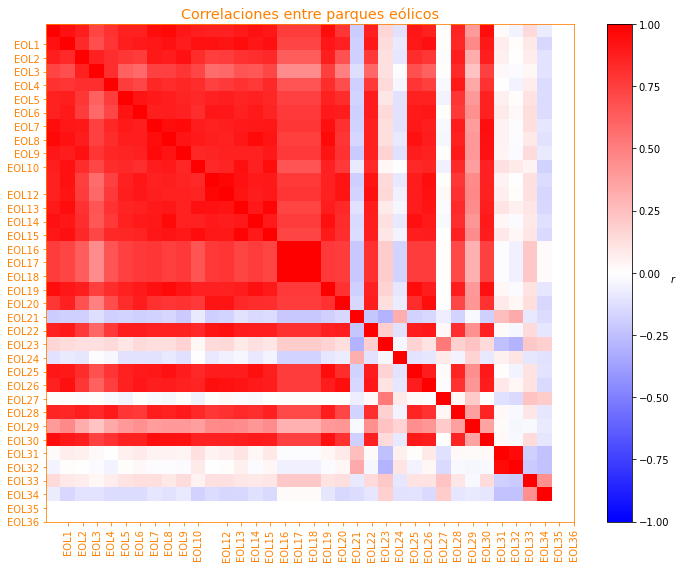

In [9]:
plt.figure(figsize = (10,8))
ax = plt.axes()
im = ax.imshow(np.corrcoef(X.T), cmap="bwr", vmin=-1, vmax=1, aspect='auto')
feature_names = ['EOL1','EOL2','EOL3','EOL4','EOL5','EOL6','EOL7','EOL8','EOL9','EOL10','EOL12','EOL13','EOL14','EOL15','EOL16','EOL17','EOL18','EOL19','EOL20','EOL21','EOL22','EOL23','EOL24','EOL25','EOL26','EOL27','EOL28','EOL29','EOL30','EOL31','EOL32','EOL33','EOL34','EOL35','EOL36']
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
ax.set_yticklabels(list(feature_names))

plt.tick_params(colors = LETRASNARA, which='both')
ax.spines['bottom'].set_color(LETRASNARA)
ax.spines['top'   ].set_color(LETRASNARA) 
ax.spines['right' ].set_color(LETRASNARA)
ax.spines['left'  ].set_color(LETRASNARA)    

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Correlaciones entre parques eólicos", color=LETRASNARA, fontsize='x-large')
plt.savefig('fig_t14_corr_eol', transparent=True)    
plt.tight_layout()



 PCA :

[[ 2.03068164e-01  1.47713868e-02 -5.03069501e-03 -5.63667471e-02]
 [ 2.03521293e-01 -3.24407016e-02  4.39079384e-02 -2.13440361e-02]
 [ 1.87900248e-01 -2.42105958e-02  2.37110786e-02 -1.96013038e-01]
 [ 1.56138119e-01 -3.53985101e-02  1.02003133e-01 -3.36756593e-01]
 [ 1.82997169e-01 -8.72498110e-03  3.47584985e-02 -1.77755027e-01]
 [ 1.95340156e-01 -2.54470177e-02 -3.96078752e-02  2.08088481e-02]
 [ 1.97659638e-01 -1.38384283e-02 -1.53077545e-02  8.86376300e-02]
 [ 2.04889879e-01 -8.60426323e-03 -2.30862737e-02 -5.20101059e-02]
 [ 2.04608328e-01 -2.24062829e-02 -5.54736111e-03 -7.35752150e-02]
 [ 2.02273233e-01  9.33706091e-03  2.15599622e-03 -6.57397416e-02]
 [ 1.94259554e-01 -9.94117802e-02  4.12695254e-02 -8.95620454e-02]
 [ 1.99628121e-01 -7.79768506e-03  3.97675231e-03  8.04475071e-02]
 [ 2.01002615e-01 -1.55714383e-02  2.72047599e-02  9.06887857e-02]
 [ 2.01102088e-01 -6.62452227e-02  4.27828746e-02  1.66560555e-03]
 [ 2.01080475e-01 -1.80402971e-02 -9.78380373e-03 -1

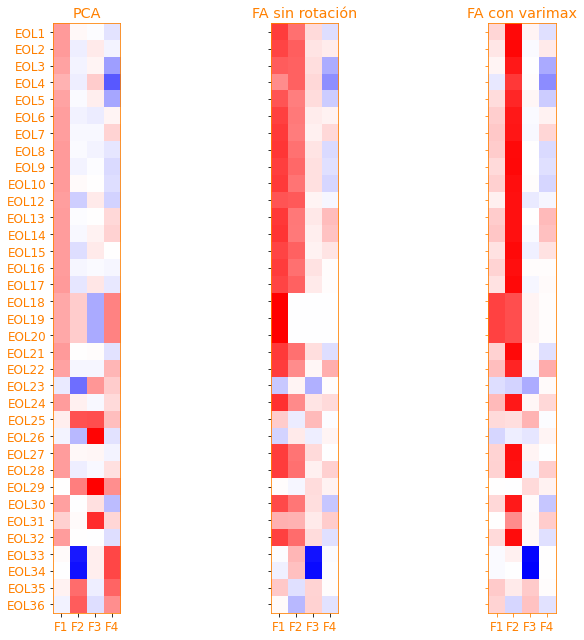

In [10]:
n_fact= 4

methods = [("PCA", PCA()),("FA sin rotación", FactorAnalysis()),("FA con varimax", FactorAnalysis(rotation="varimax")),]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10,9))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_fact)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="bwr", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names, color=LETRASNARA, fontsize='large')
        plt.tick_params(colors = LETRASNARA)
    else:
        ax.set_yticklabels([], color=LETRASNARA, fontsize='large')
        plt.tick_params(colors = LETRASNARA)

    ax.set_title(str(method), color=LETRASNARA, fontsize='x-large')
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(["F1","F2","F3","F4"], color=LETRASNARA, fontsize='large')

    ax.spines['bottom'].set_color(LETRASNARA)
    ax.spines['top'   ].set_color(LETRASNARA) 
    ax.spines['right' ].set_color(LETRASNARA)
    ax.spines['left'  ].set_color(LETRASNARA)

plt.tight_layout()
plt.savefig('fig_t14_varimax', transparent=True) 
plt.show()

# 14.3.12 Hierarchical Clustering

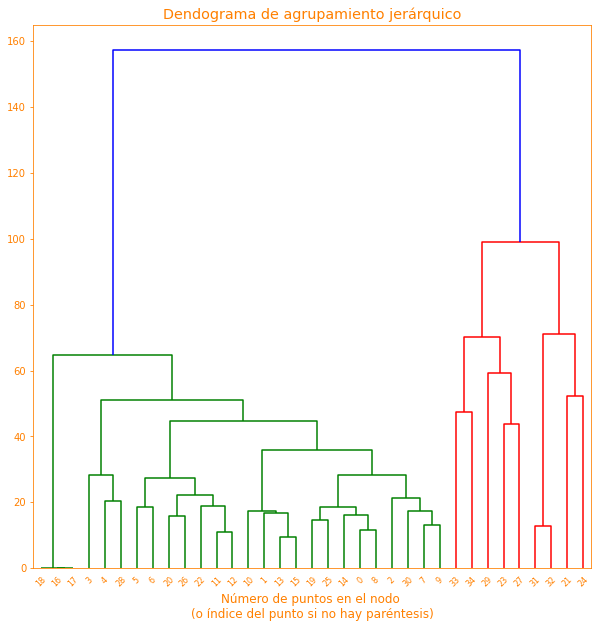

In [20]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#
#https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/#:~:text=Interpretaci%C3%B3n,una%20l%C3%ADnea%20horizontal%20del%20dendrograma.

# Create linkage matrix and then plot the dendrogram
def plot_dendrogram(model, **kwargs):
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters= None).fit(X.T)

# plot the top 'p' levels of the dendrogram
p = 100

fig, ax = plt.subplots(figsize=(10,10))
plt.tick_params(colors = LETRASNARA, which='both')
ax.spines['bottom'].set_color(LETRASNARA)
ax.spines['top'   ].set_color(LETRASNARA) 
ax.spines['right' ].set_color(LETRASNARA)
ax.spines['left'  ].set_color(LETRASNARA)    

plt.title("Dendograma de agrupamiento jerárquico",color=LETRASNARA,fontsize='x-large')
plot_dendrogram(model, truncate_mode="level", p=p)


plt.xlabel("Número de puntos en el nodo \n(o índice del punto si no hay paréntesis)",  color=LETRASNARA, fontsize='large')
plt.savefig('fig_t14_dendogram', transparent=True)    
plt.show()

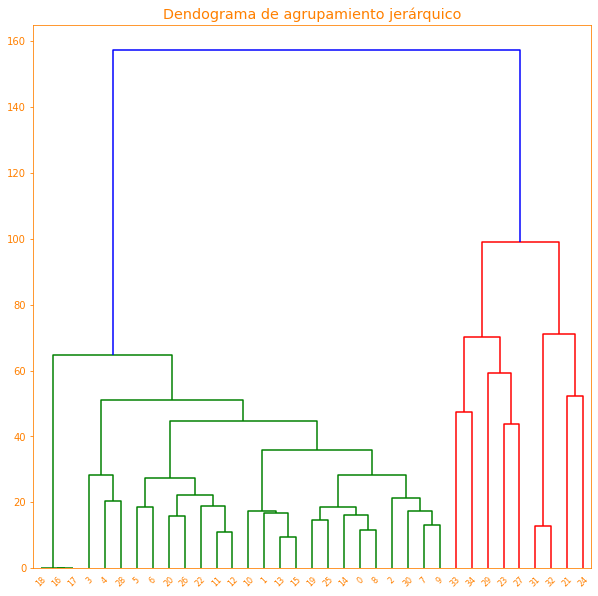

In [19]:
# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(distance_threshold=None, n_clusters= 4).fit(X.T)

import scipy.cluster.hierarchy as shc

fig, ax = plt.subplots(figsize=(10,10))
plt.tick_params(colors = LETRASNARA, which='both')
ax.spines['bottom'].set_color(LETRASNARA)
ax.spines['top'   ].set_color(LETRASNARA) 
ax.spines['right' ].set_color(LETRASNARA)
ax.spines['left'  ].set_color(LETRASNARA)    

plt.title("Dendograma de agrupamiento jerárquico",color=LETRASNARA,fontsize='x-large')

dend = shc.dendrogram(shc.linkage(X.T, method='ward'))

plt.savefig('fig_t14_dendogram2', transparent=True)  
plt.show()

El dendrograma formado tiene una partición final de 2 conglomerados (uno en verde y uno en azul), lo cual ocurre a un nivel de similitud de aproximadamente 160. El primer conglomerado (verde) se compone de 26 observaciones (las observaciones de filas 18,16,17,4,28,2,3,5,6,20,26,22,11,12,10,1,13,15,8,14,19,25,7,9,0,30). El segundo conglomerado, se compone de 9 observaciones (las observaciones de las filas 33,34,29,23,27,31,32,21,24). 
Si se cortara el dendrograma más arriba, entonces habría menos conglomerados finales, pero su nivel de similitud sería menor. Si se cortara el dendrograma más abajo, entonces el nivel de similitud sería mayor, pero habría más conglomerados finales.